Implementare le function necessarie per costruire il polinomio interpolante di Lagrange. 

                                                                [5 punti]
                                                         
                                                         

In [36]:
import numpy as np
import scipy.linalg as spLin
import matplotlib.pyplot as plt
import RisolviSis

In [37]:
def plagr(xnodi,k):
    """
    Restituisce i coefficienti del k-esimo pol di
    Lagrange associato ai punti del vettore xnodi
    """
    xzeri = np.zeros_like(xnodi)
    n = xnodi.size
    if k == 0:
        xzeri = xnodi[1:n]
    else:
        xzeri = np.append(xnodi[0:k],xnodi[k+1:n])
    
    num = np.poly(xzeri)
    den = np.polyval(num, xnodi[k])
    
    p =  num / den
    
    return p

In [38]:
def InterpL(x, f, xx):
    """"
        %funzione che determina in un insieme di punti il valore del polinomio
        %interpolante ottenuto dalla formula di Lagrange.
        % DATI INPUT
        %  x  vettore con i nodi dell'interpolazione
        %  f  vettore con i valori dei nodi 
        %  xx vettore con i punti in cui si vuole calcolare il polinomio
        % DATI OUTPUT
        %  y vettore contenente i valori assunti dal polinomio interpolante
        %
    """
    n = x.size
    m = xx.size
    L = np.zeros((m,n))
    for k in range(n):
        p = plagr(x, k)
        L[:,k] = np.polyval(p, xx)

    return np.dot(L,f)

Sia assegnata la funzione $f(x)=cos(\pi x)+sin(\pi x)$, $ x \in [0,2]$

facendo uso delle functions implementate precedentemente, si determini il polinomio p che interpola f nei nodi  x0 = 1, x1 = 1.5, x2 = 1.75.

                                                               [3 punti]

In [39]:
x = np.array([1.0, 1.5, 1.75])
f = lambda x: np.cos(np.pi*x) + np.sin(np.pi*x)
y = f(x)
xx = np.linspace(0, 2, 200)
polL = InterpL(x, y, xx)

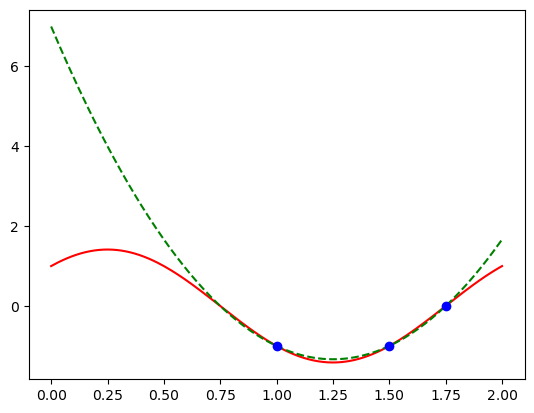

In [40]:
plt.plot(xx, f(xx), 'r-', xx, polL, 'g--', x, y, 'bo')
plt.show()

 si calcoli il valore assunto dalla funzione errore E(x) := |f(x) − p(x)| nel punto $x^∗$ = 0.75 e si definisca teoricamente da cosa dipende l'errore che si compie quando al posto del polinomio interpolatore si considera la funzione che ha generato i dati, commentando opportunamente la formula
 
                                                             [3 punti]

Errore =  [2.22044605e-16]


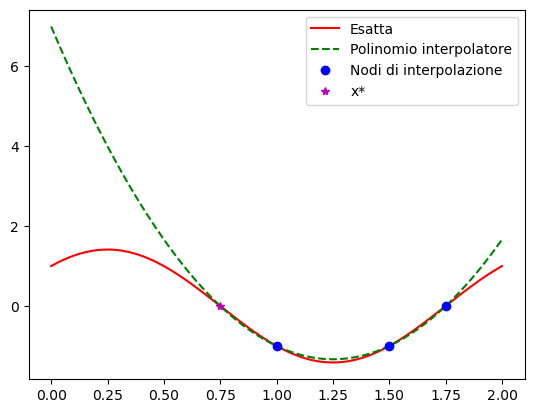

In [41]:
xstar = np.array([0.75])
val_xstar = InterpL(x, y, xstar)
errore = np.abs(f(xstar) - val_xstar)
print("Errore = ", errore)
plt.plot(xx, f(xx), 'r-', xx, polL, 'g--', x, y, 'bo', xstar, val_xstar, 'm*')
plt.legend(["Esatta", "Polinomio interpolatore", "Nodi di interpolazione", "x*"])
plt.show()

si stabilisca qual è il polinomio interpolatore per f passante per i nodi $x^*$ 
, x0, x1 e x2.


                                                            [2 punti]

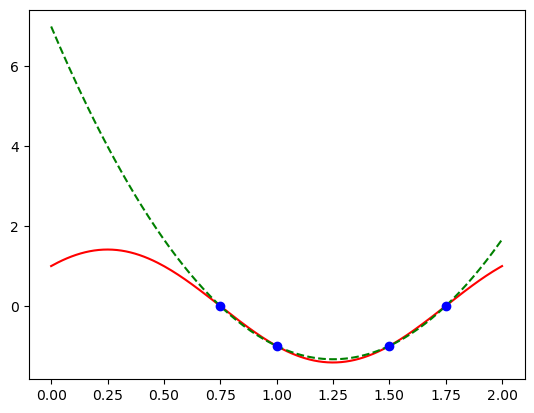

In [42]:
x = np.array([0.75, 1.0, 1.5, 1.75])
y = f(x)
polL = InterpL(x, y, xx)
plt.plot(xx, f(xx), 'r-', xx, polL, 'g--', x, y, 'bo')

Come spiegato in precedenza si era notato che x* fosse un nodo di interpolazione dato che l'errore calcolato in precedenza era nullo.
Controllando graficamente si nota che se aggiunto x* ai nodi di interpolazione si denota la veridicità dell'affermazione.

Si calcoli la costante di Lebesgue e si dica che ruolo svolge nell'ambito dell'interpolazione polinomiale

                                                             [3 punti]

In [55]:
def Lebesgue(x):
    sommaL = np.zeros_like(xx)
    for j in range (x.shape[0]):
        p = plagr(x, j)
        L = np.polyval(p, xx)
        sommaL = sommaL + np.abs(L)
    return np.max(sommaL)

In [56]:
Lebesgue(polL)

2.2833534707306584e+78